# **Lab2.2 : Image Enhancement with Statistical Operation** 

In this lab, you will execute two techniques: Image Histogram Equalization and Histogram Matching. Additionally, you will explore the pixel values of the image through a histogram.

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

## **Histogram Equalization**
Read an image using OpenCV (Use your own image).

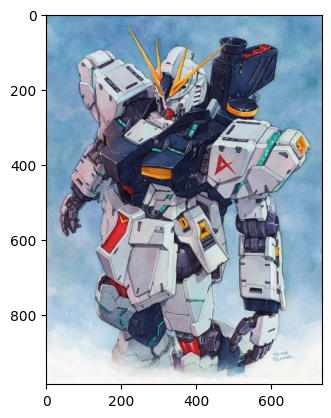

In [34]:
### START CODE HERE ###
img = cv2.imread("./images/nu gundam 02.jpg")
# img = cv2.imread("./images/japan local.jpg")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
### END CODE HERE ###

Complete the `plot_histogram()` function below. This function returns the histogram of an image's pixel values, using `cv2.calcHist()`.

In [35]:
### START CODE HERE ###
def plot_histogram(image):
    hist = []
    for i in range(3):
        channel_hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        hist.append(channel_hist)
    return hist
### END CODE HERE ###

Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-1.png?raw=true)
</details>

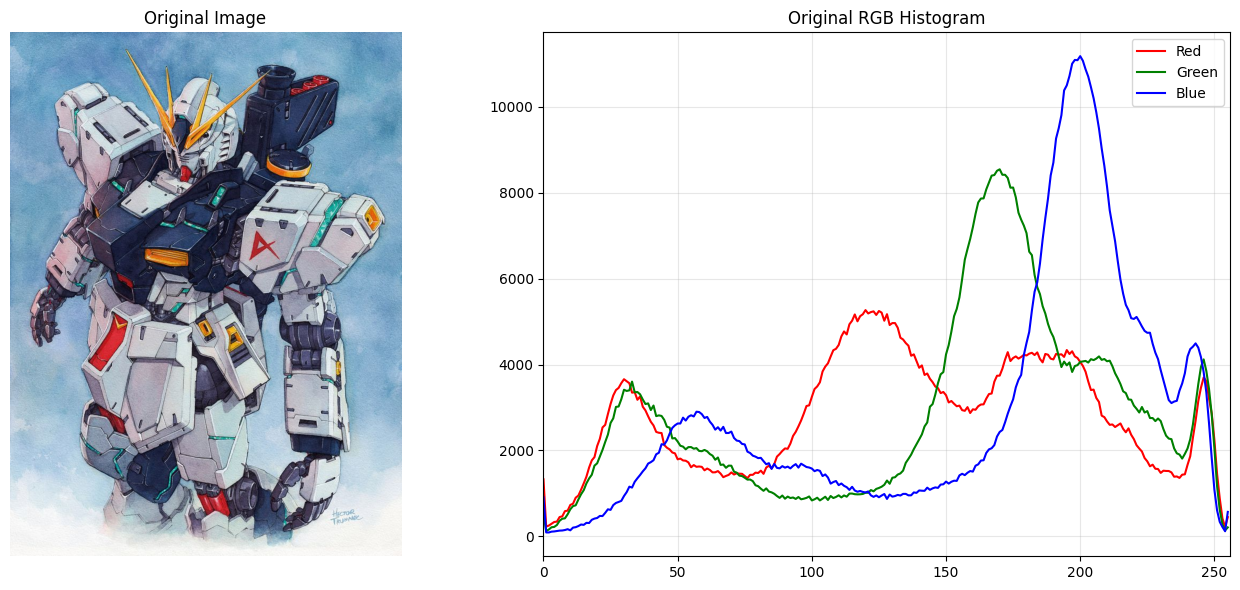

In [36]:
### START CODE HERE ###
histograms = plot_histogram(rgb_img)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(rgb_img)
axes[0].set_title('Original Image')
axes[0].axis('off')

colors = ('red', 'green', 'blue')
for i, color in enumerate(colors):
    axes[1].plot(histograms[i], color=color, label=color.capitalize())

axes[1].set_title('Original RGB Histogram')
axes[1].set_xlim([0, 256])
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()
### END CODE HERE ###

Now let's equalize the histogram of all channel using `cv2.equalizeHistogram()`<br/>
Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel that that has been equalized.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-2.png?raw=true)
</details>

In [37]:
def manageEqualizeHistogram(image):
    r, g, b = cv2.split(image)
    
    r_eq = cv2.equalizeHist(r)
    g_eq = cv2.equalizeHist(g)
    b_eq = cv2.equalizeHist(b)
    
    equalized_image = cv2.merge([r_eq, g_eq, b_eq])
    return equalized_image

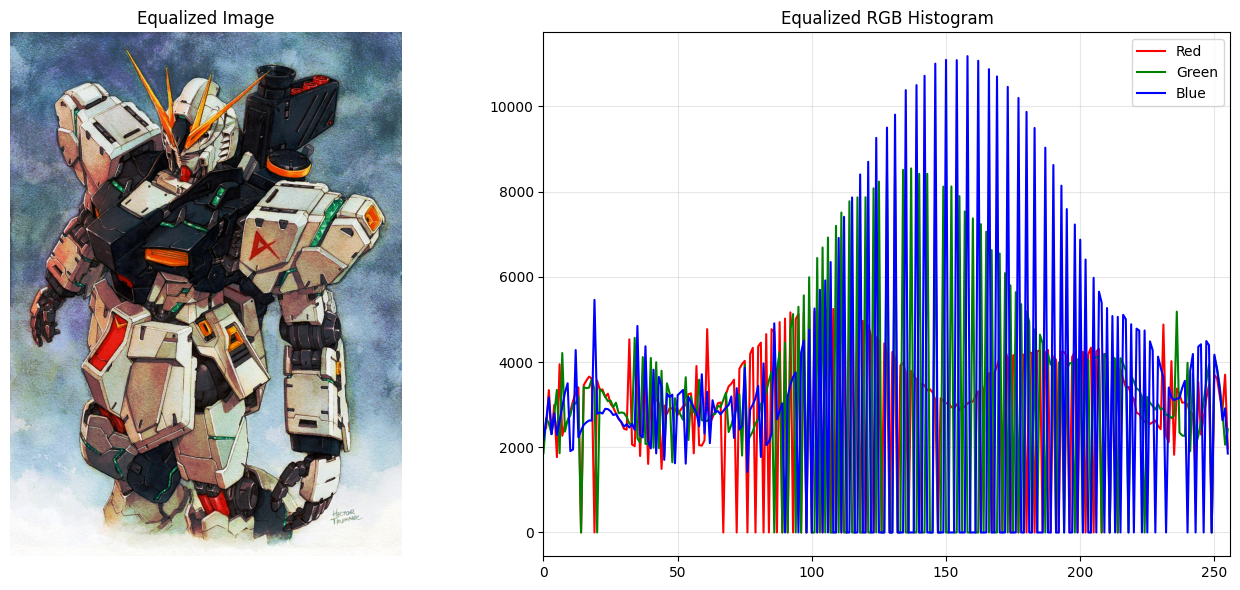

In [38]:
### START CODE HERE ###
equalized_img = manageEqualizeHistogram(rgb_img)
eq_histograms = plot_histogram(equalized_img)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].imshow(equalized_img)
axes[0].set_title('Equalized Image')
axes[0].axis('off')

colors = ('red', 'green', 'blue')
for i, color in enumerate(colors):
    axes[1].plot(eq_histograms[i], color=color, label=color.capitalize())

axes[1].set_title('Equalized RGB Histogram')
axes[1].set_xlim([0, 256])
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()
### END CODE HERE ###

## **Image Histogram Matching**
Read 2 images using OpenCV. Use your own images. One image will be the input image and the other will be the template image.

In [39]:
### START CODE HERE ###
img1 = cv2.imread("./images/nu gundam 02.jpg")
img2 = cv2.imread("./images/gundam unknown.jpg")

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

height, width = 480, 360
img1_rgb = cv2.resize(img1_rgb, (width, height))
img2_rgb = cv2.resize(img2_rgb, (width, height))
### END CODE HERE ###

Let's explore 2 images. Use suplot to plot :
- An image
- PDF(Probability Density Function) of each channel
- CDF(Cumulative Distribution Function) of each channel 

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-3.png?raw=true)
</details>

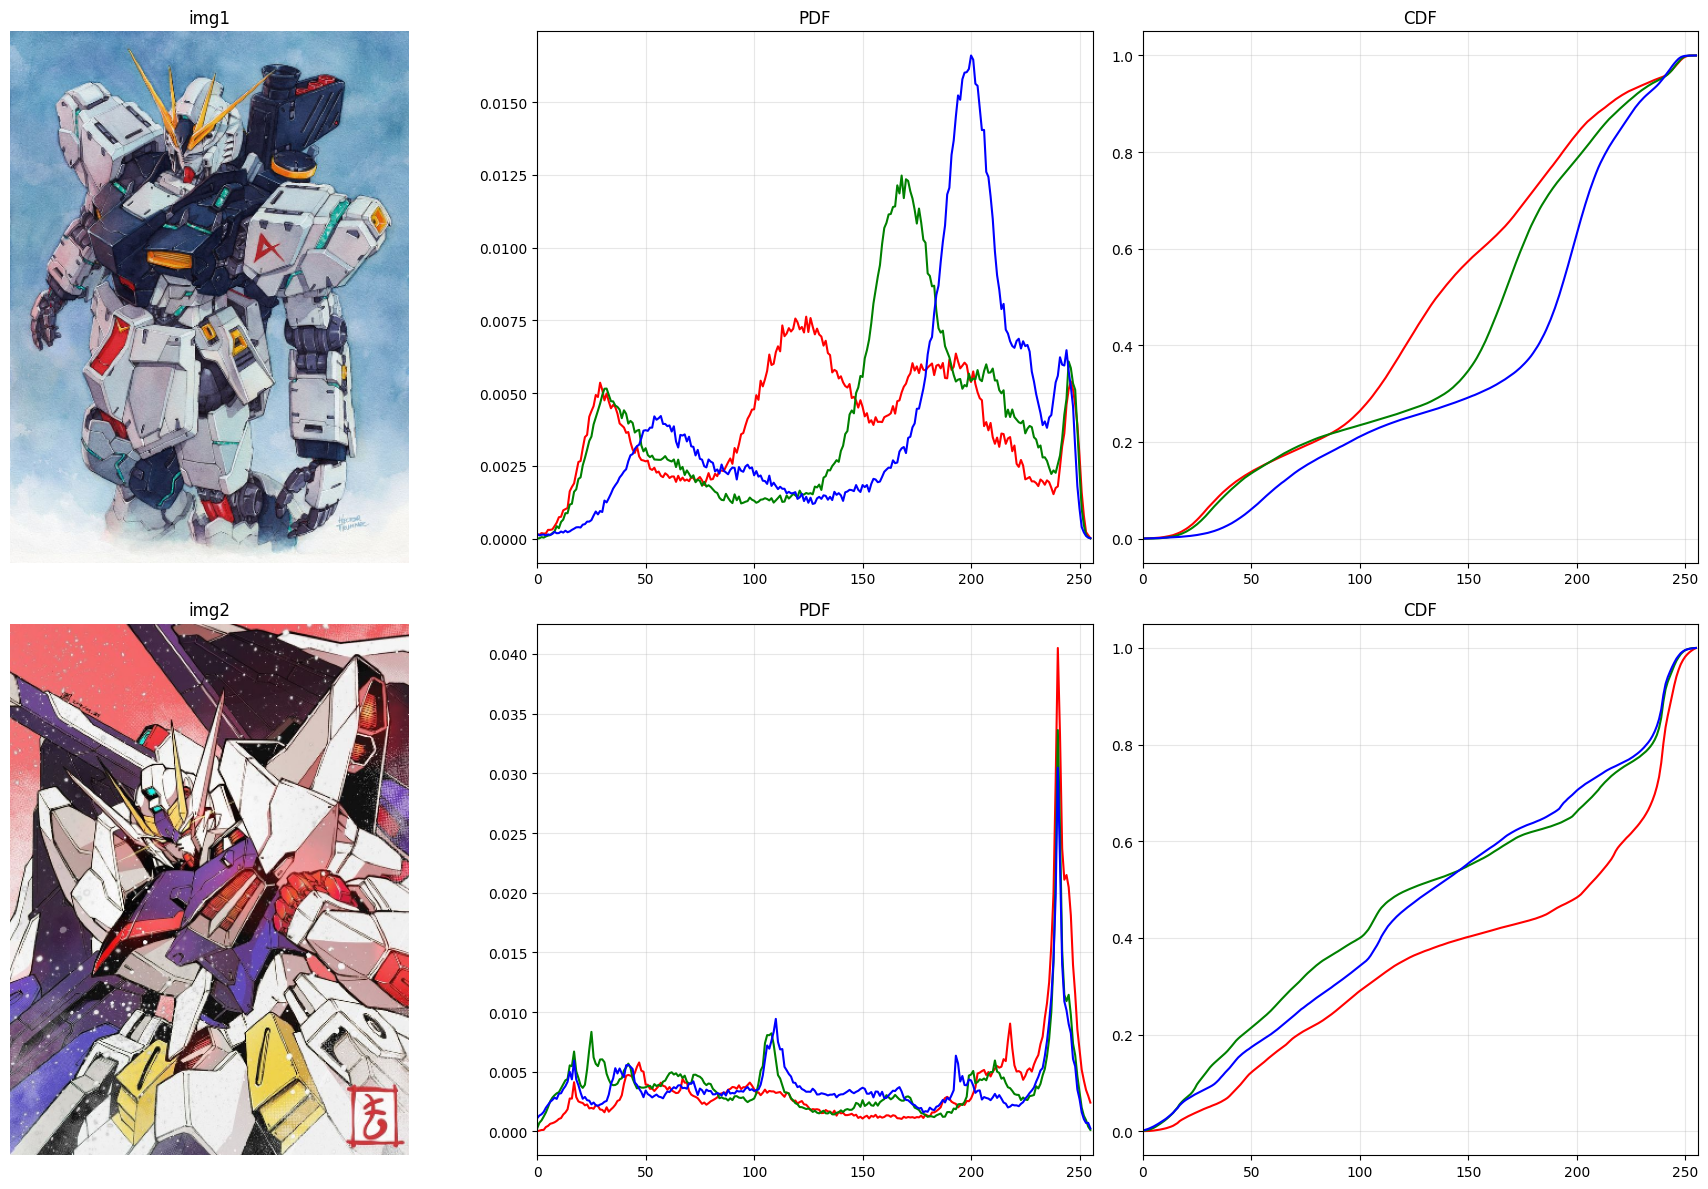

In [40]:
### START CODE HERE ###
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

colors = ('red', 'green', 'blue')

def calc_pdf(image):
    pdfs = []
    total_pixels = image.shape[0] * image.shape[1]
    for i in range(3):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        # Normalize to get probability
        pdf = hist / total_pixels
        pdfs.append(pdf)
    return pdfs

# Function to calculate CDF from PDF
def calc_cdf(pdfs):
    cdfs = []
    for pdf in pdfs:
        cdf = np.cumsum(pdf)
        cdfs.append(cdf)
    return cdfs

axes[0, 0].imshow(img1_rgb)
axes[0, 0].set_title('img1')
axes[0, 0].axis('off')

pdfs1 = calc_pdf(img1_rgb)
for i, color in enumerate(colors):
    axes[0, 1].plot(pdfs1[i], color=color)
axes[0, 1].set_title('PDF')
axes[0, 1].set_xlim([0, 256])
axes[0, 1].grid(alpha=0.3)

cdfs1 = calc_cdf(pdfs1)
for i, color in enumerate(colors):
    axes[0, 2].plot(cdfs1[i], color=color)
axes[0, 2].set_title('CDF')
axes[0, 2].set_xlim([0, 256])
axes[0, 2].grid(alpha=0.3)

axes[1, 0].imshow(img2_rgb)
axes[1, 0].set_title('img2')
axes[1, 0].axis('off')

pdfs2 = calc_pdf(img2_rgb)
for i, color in enumerate(colors):
    axes[1, 1].plot(pdfs2[i], color=color)
axes[1, 1].set_title('PDF')
axes[1, 1].set_xlim([0, 256])
axes[1, 1].grid(alpha=0.3)

cdfs2 = calc_cdf(pdfs2)
for i, color in enumerate(colors):
    axes[1, 2].plot(cdfs2[i], color=color)
axes[1, 2].set_title('CDF')
axes[1, 2].set_xlim([0, 256])
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()
### END CODE HERE ###

Perform Histogram matching in the cell below.
Show the result like the reference image below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://raw.githubusercontent.com/Digital-Image-Processing-Laboratory/Image-Processing-Course-2025/main/Lab2_Image-Enhancement/assets/2-4.png?raw=true)
</details>

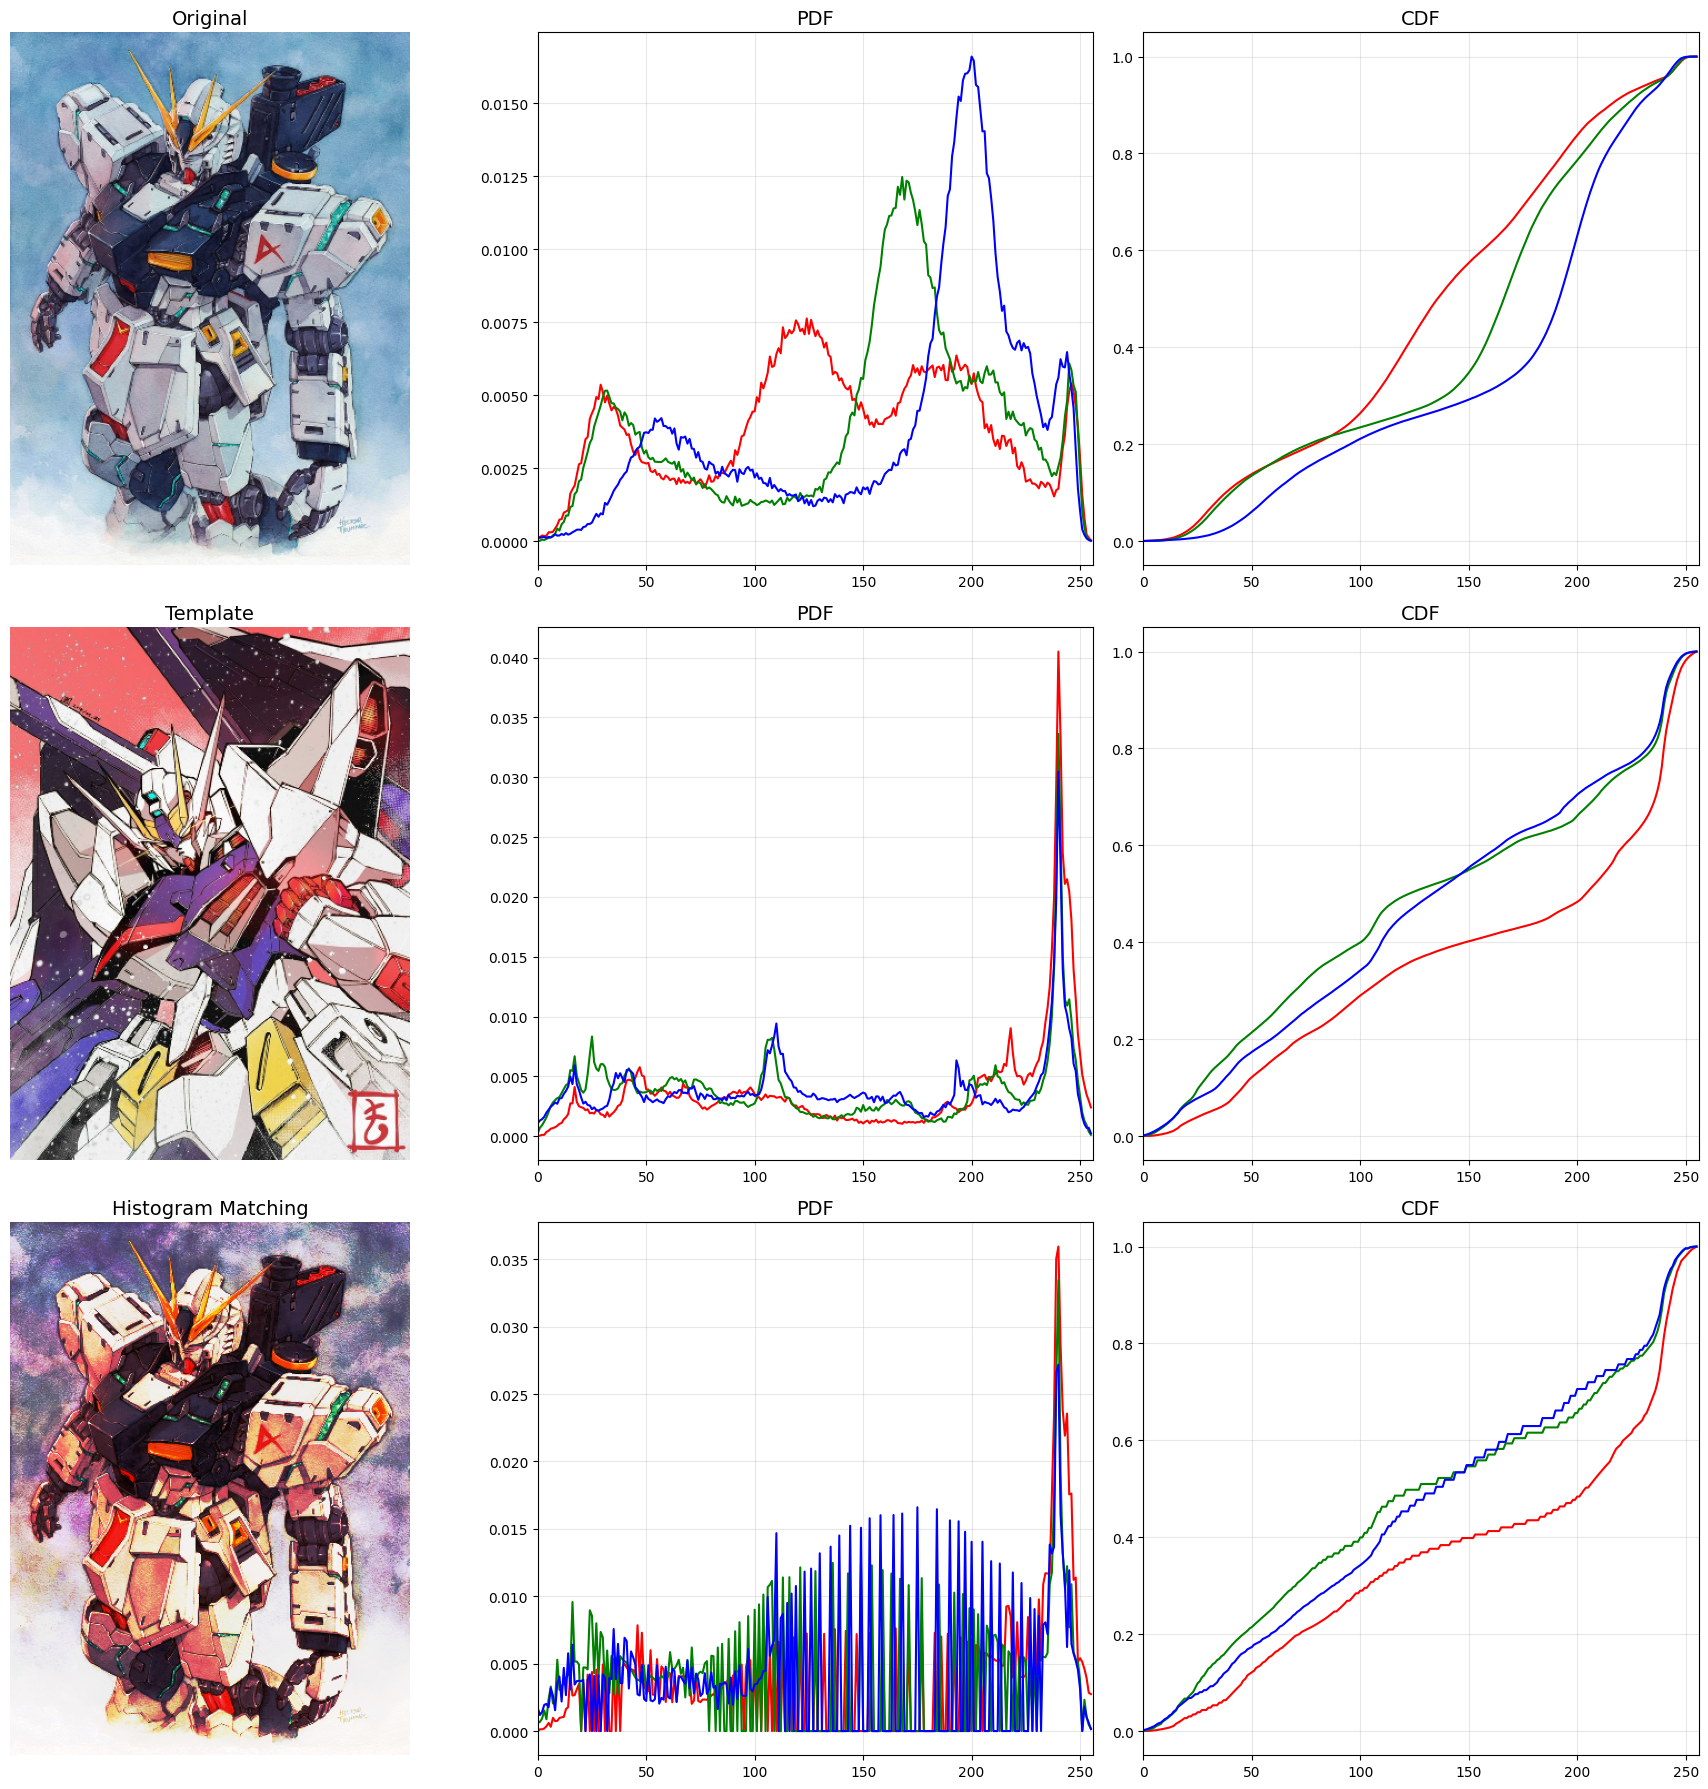

In [ ]:
### START CODE HERE ###
def histogram_matching(source, template):
    matched = np.zeros_like(source)
    
    # Process each channel separately
    for i in range(3):  # RGB channels
        # Get source and template channel
        src_channel = source[:,:,i]
        tmp_channel = template[:,:,i]
        
        # Calculate histograms
        src_hist, _ = np.histogram(src_channel.flatten(), 256, [0,256])
        tmp_hist, _ = np.histogram(tmp_channel.flatten(), 256, [0,256])
        
        # Calculate CDFs
        src_cdf = src_hist.cumsum() / src_hist.sum()
        tmp_cdf = tmp_hist.cumsum() / tmp_hist.sum()
        
        # Create mapping of intensities
        mapping = np.zeros(256)
        for j in range(256):
            # Find closest CDF value
            mapping[j] = np.argmin(np.abs(src_cdf[j] - tmp_cdf))
        
        # Apply mapping to the source channel
        matched_channel = mapping[src_channel]
        matched[:,:,i] = matched_channel
    
    return matched.astype(np.uint8)

matched_img = histogram_matching(img1_rgb, img2_rgb)

fig, axes = plt.subplots(3, 3, figsize=(18, 18))

axes[0, 0].imshow(img1_rgb)
axes[0, 0].set_title('Original', fontsize=14)
axes[0, 0].axis('off')

axes[1, 0].imshow(img2_rgb)
axes[1, 0].set_title('Template', fontsize=14)
axes[1, 0].axis('off')

axes[2, 0].imshow(matched_img)
axes[2, 0].set_title('Histogram Matching', fontsize=14)
axes[2, 0].axis('off')

pdfs1 = calc_pdf(img1_rgb)
for i, color in enumerate(colors):
    axes[0, 1].plot(pdfs1[i], color=color)
axes[0, 1].set_title('PDF', fontsize=14)
axes[0, 1].set_xlim([0, 256])
axes[0, 1].grid(alpha=0.3)

pdfs2 = calc_pdf(img2_rgb)
for i, color in enumerate(colors):
    axes[1, 1].plot(pdfs2[i], color=color)
axes[1, 1].set_title('PDF', fontsize=14)
axes[1, 1].set_xlim([0, 256])
axes[1, 1].grid(alpha=0.3)

pdfs_matched = calc_pdf(matched_img)
for i, color in enumerate(colors):
    axes[2, 1].plot(pdfs_matched[i], color=color)
axes[2, 1].set_title('PDF', fontsize=14)
axes[2, 1].set_xlim([0, 256])
axes[2, 1].grid(alpha=0.3)

cdfs1 = calc_cdf(pdfs1)
for i, color in enumerate(colors):
    axes[0, 2].plot(cdfs1[i], color=color)
axes[0, 2].set_title('CDF', fontsize=14)
axes[0, 2].set_xlim([0, 256])
axes[0, 2].grid(alpha=0.3)

cdfs2 = calc_cdf(pdfs2)
for i, color in enumerate(colors):
    axes[1, 2].plot(cdfs2[i], color=color)
axes[1, 2].set_title('CDF', fontsize=14)
axes[1, 2].set_xlim([0, 256])
axes[1, 2].grid(alpha=0.3)

cdfs_matched = calc_cdf(pdfs_matched)
for i, color in enumerate(colors):
    axes[2, 2].plot(cdfs_matched[i], color=color)
axes[2, 2].set_title('CDF', fontsize=14)
axes[2, 2].set_xlim([0, 256])
axes[2, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()
### END CODE HERE ###

---

## **Questions**
1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device.
2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be?
3. How would we enhance an image having too bright in some area and too dark in another area?

## **Answers**
1. สีไม่ค่อยชัด
2. distributed histrogram should be template image
3. with normalize cumulative histogram because มันเกลี่ยแสงให้มีความสมํ่าเสมอ